In [1]:
# uncomment this line if you want to use interactive plot (only works in Jupyter but not in VScode)
# %matplotlib ipympl

import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

import os
print(os.getcwd())#显示当前路径
os.chdir('D:/bio/SLAT/SLAT-main')#更改路径，''里面为更改的路径
print(os.getcwd())#显示当前路径
import scSLAT
from scSLAT.model import run_SLAT_multi
from scSLAT.viz import build_3D

D:\bio\jupyter_code\DLPFC
D:\bio\SLAT\SLAT-main


In [2]:
sc.set_figure_params(dpi=100, dpi_save=150)

In [3]:
datasets = [str(i) for i in range(151673, 151677)]
# datasets = ['151673', '151674', '151675', '151676']
input_dir = 'D:/dataset/'  # Replace it with your file path

file_list = []
for dataset in datasets:
    file_list.append(input_dir + dataset)


# adata_list = []

# for dataset in datasets:
#     adata = sc.read_visium(input_dir + dataset)
#     adata.var_names_make_unique()
#     adata.obs_names_make_unique()
#     adata_label = pd.read_csv(input_dir + dataset + '/' + dataset + '_truth.csv', index_col=0)
#     adata.obs['batch'] = adata_label['batch']
#     adata.obs['annotation'] = adata_label['ground.truth']
#     adata_list.append(adata)

# print(adata_list)

In [4]:
def load_sample(file):
    adata = sc.read_visium(file)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adata_label = pd.read_csv(file + '/truth.csv', index_col=0)
    adata.obs['batch'] = adata_label['batch']
    adata.obs['annotation'] = adata_label['ground.truth']
    # adata = sc.read_h5ad(file)
    # # subsample 8000 cells
    # adata = sc.pp.subsample(adata, n_obs=8000, random_state=0, copy=True)
    return adata

In [5]:
adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
    (delayed(load_sample)(file) for file in itemgetter(*[0,1,2,3])(file_list))

In [6]:
print(adata1)
print(adata2)
print(adata3)
print(adata4)

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3673 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3592 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


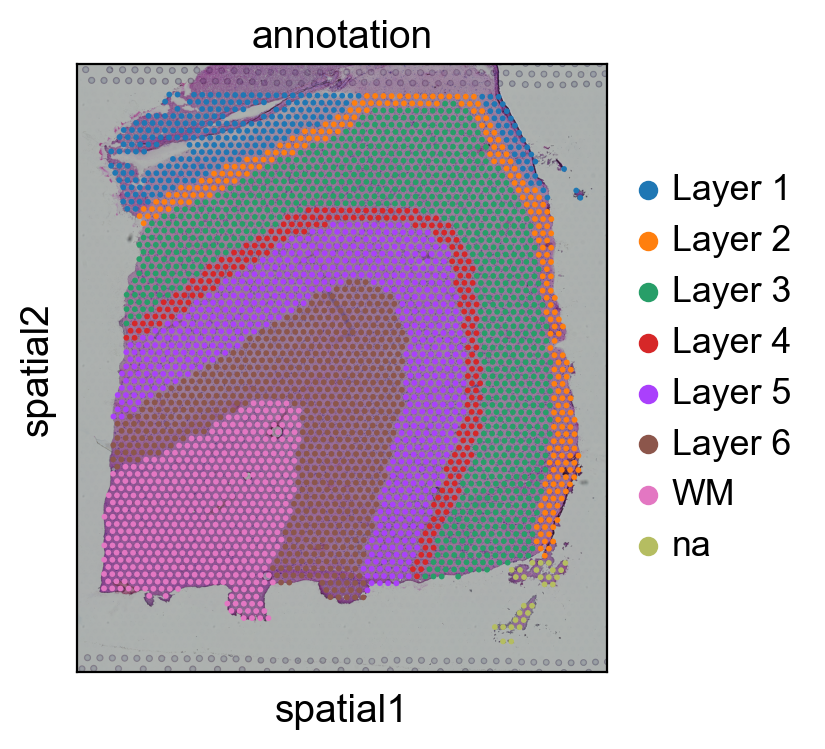

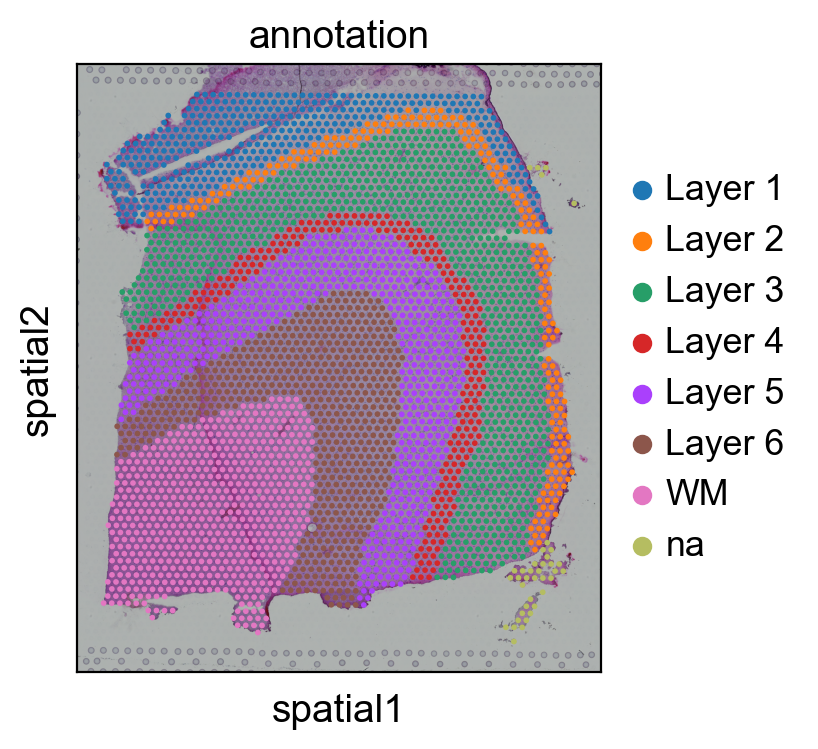

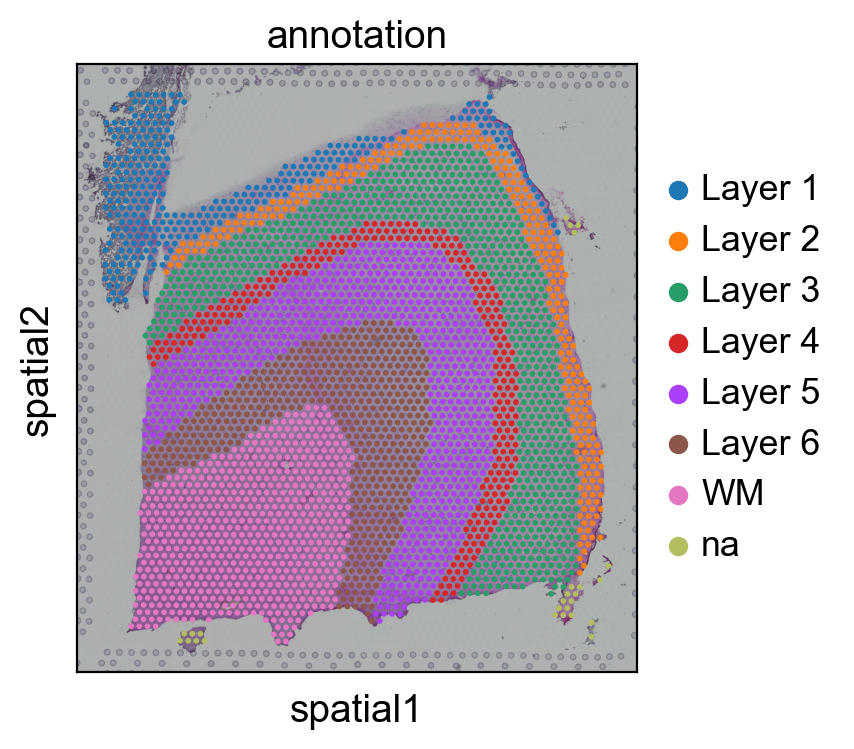

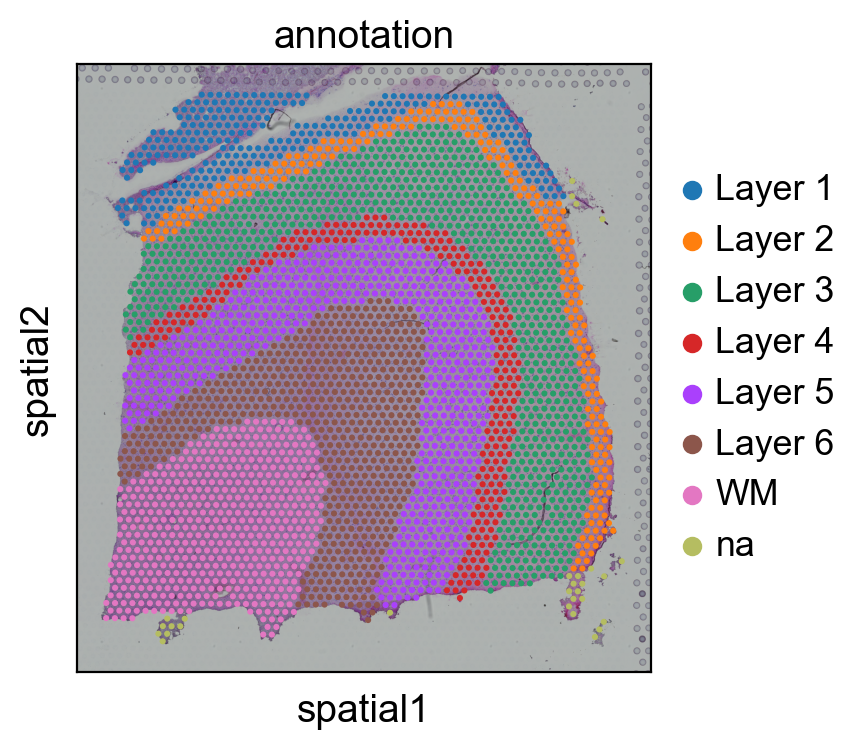

In [7]:
sc.pl.spatial(adata1, img_key="hires", color='annotation')
sc.pl.spatial(adata2, img_key="hires", color='annotation')
sc.pl.spatial(adata3, img_key="hires", color='annotation')
sc.pl.spatial(adata4, img_key="hires", color='annotation')

In [8]:
start = time.time()
matching_list, zip_res = run_SLAT_multi([adata1,adata2,adata3,adata4], k_cutoff=10)
print(f'Use {time.time()-start:.2f} seconds')

Use 25.57 seconds


In [9]:
print(matching_list)
print(zip_res)
print(adata1)
print(adata2)
print(adata3)
print(adata4)

[array([[   2,    8,   10,   20,   25,   58,   64,   67,   69,   73,   76,
          77,   88,  123,  132,  133,  141,  144,  151,  176,  177,  182,
         186,  195,  196,  211,  212,  220,  226,  229,  245,  252,  266,
         272,  274,  294,  308,  309,  327,  329,  335,  336,  341,  345,
         374,  377,  379,  389,  390,  400,  401,  403,  407,  408,  436,
         451,  453,  455,  462,  469,  472,  477,  479,  499,  501,  507,
         508,  516,  528,  529,  533,  536,  550,  561,  564,  585,  587,
         598,  600,  608,  616,  617,  618,  623,  637,  639,  651,  661,
         667,  672,  700,  702,  742,  750,  751,  752,  767,  786,  800,
         805,  808,  815,  821,  822,  827,  831,  846,  851,  852,  872,
         884,  886,  910,  922,  923,  933,  934,  955,  971,  973,  978,
         981,  994, 1005, 1014, 1029, 1036, 1037, 1040, 1044, 1052, 1062,
        1063, 1064, 1082, 1108, 1115, 1126, 1127, 1155, 1161, 1176, 1201,
        1215, 1238, 1241, 1257, 1260,

In [10]:
index_list = [i[1] for i in zip_res] 
print(index_list)
print(index_list[2].shape)

[array([[2726,  651, 2752, ...,  896, 3614, 2994],
       [3456, 3127, 2425, ..., 2907,  248,  437],
       [2856, 2323,  312, ...,  978,  259, 3513],
       ...,
       [ 108, 2996, 3431, ...,  990, 2705,  586],
       [3216, 2152, 2438, ...,  735, 3376, 3511],
       [2868, 2306, 2216, ..., 2538,  286,   82]], dtype=int64), array([[3519,  776, 3350, ...,  963, 1600, 1712],
       [ 462,   34, 3436, ..., 2840,  825, 3189],
       [1853,   69, 1716, ...,  345,  852, 2837],
       ...,
       [1260,  245, 1853, ...,  851, 2795, 2381],
       [ 680, 2333, 2931, ..., 1311, 2306,  956],
       [2391, 2221, 2878, ..., 3385,  600, 3565]], dtype=int64), array([[2907, 2580,  948, ..., 1593,  420, 1164],
       [1496, 2763, 2588, ..., 1647,  642, 1235],
       [1511, 2204, 1875, ..., 1881, 1652,  378],
       ...,
       [1658, 1654, 3373, ...,  470, 1538,  284],
       [3526,  363, 1957, ..., 1639, 2205, 1397],
       [ 244, 3166, 3262, ..., 1556,  577,  671]], dtype=int64)]
(3460, 20)


In [36]:
print(len(zip_res))

3


In [ ]:
shape_list = []
for j, mapping in enumerate(matching_list):
    print(mapping.shape[1])
    shape_list.append(mapping.shape[1])

print(shape_list)

Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 


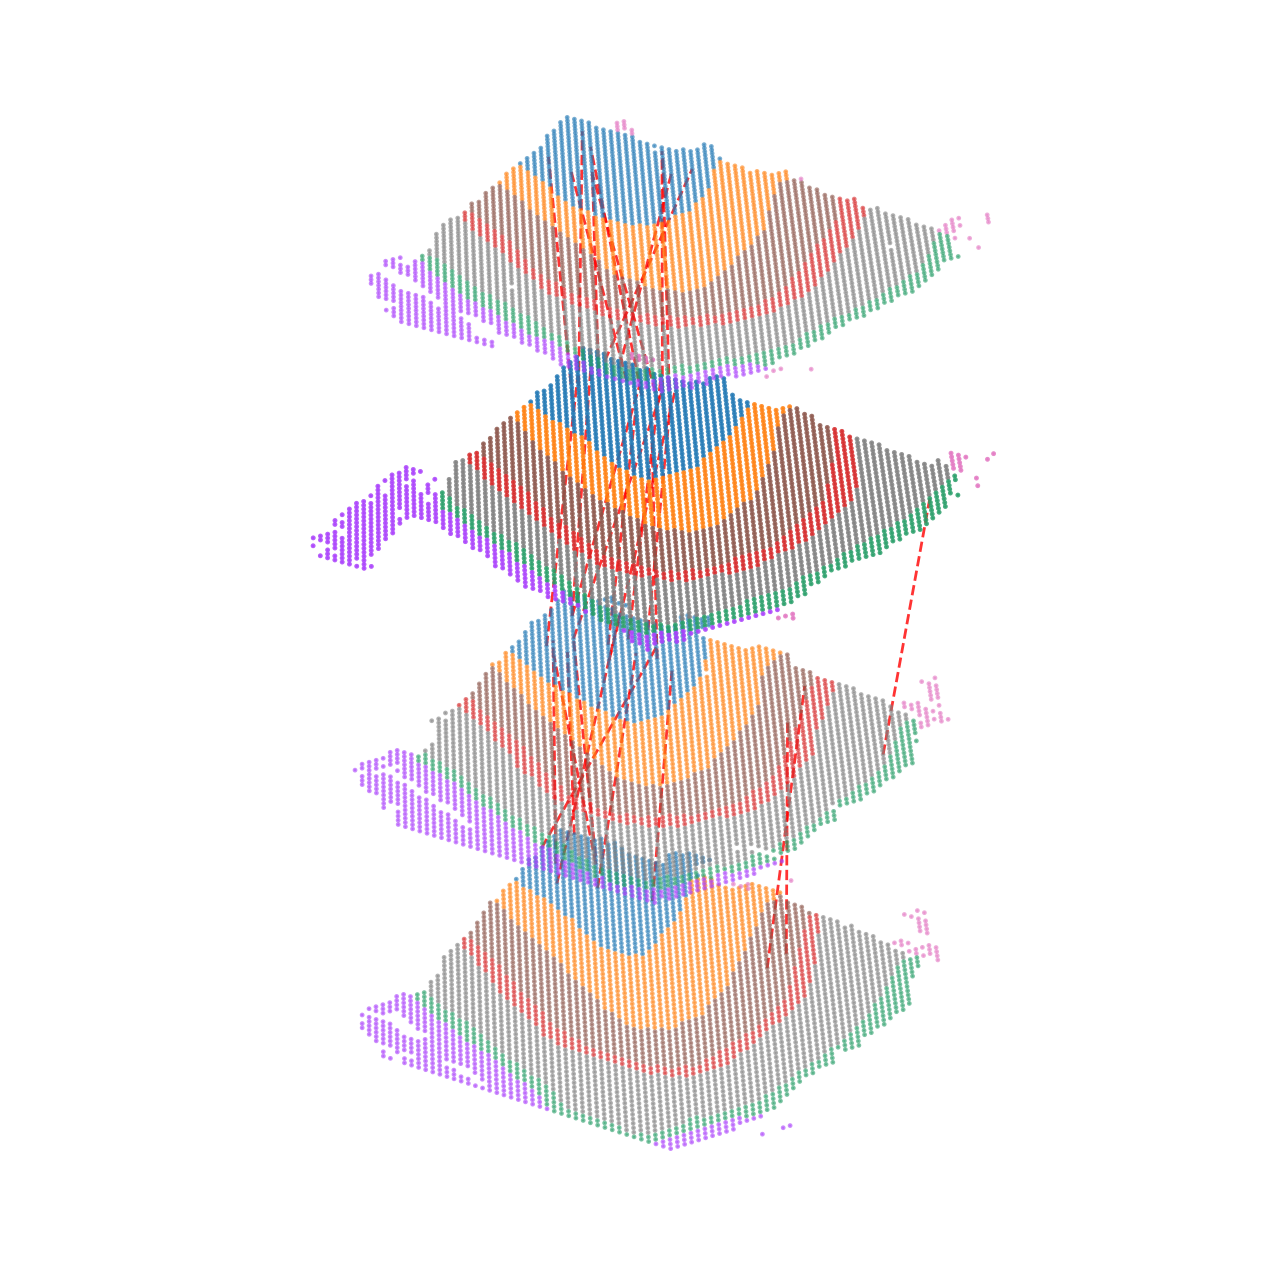

In [10]:
# model = build_3D([adata1,adata2,adata3,adata4], matching_list, subsample_size = min(shape_list), scale_coordinate = False)
model = build_3D([adata1,adata2,adata3,adata4], matching_list, subsample_size = 10, scale_coordinate = False)
model.draw_3D(hide_axis=True, line_color='red', height=10, size=[8,20], line_width=1)

In [11]:
output_dir = 'G:/dataset/1_DLPFC/output/SLAT/'
experiment_name = 'donor3'
adata1_df = pd.DataFrame({'index': range(adata1.obs.shape[0]),
                        'x': adata1.obsm['spatial'][:,0],
                        'y': adata1.obsm['spatial'][:,1],
                        'celltype': adata1.obs['annotation']})
adata1_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + datasets[0] + '.csv')

adata2_df = pd.DataFrame({'index': range(adata2.obs.shape[0]),
                        'x': adata2.obsm['spatial'][:,0],
                        'y': adata2.obsm['spatial'][:,1],
                        'celltype': adata2.obs['annotation']})
adata2_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + datasets[1] + '.csv')

adata3_df = pd.DataFrame({'index': range(adata3.obs.shape[0]),
                        'x': adata3.obsm['spatial'][:,0],
                        'y': adata3.obsm['spatial'][:,1],
                        'celltype': adata3.obs['annotation']})
adata3_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + datasets[2] + '.csv')

adata4_df = pd.DataFrame({'index': range(adata4.obs.shape[0]),
                        'x': adata4.obsm['spatial'][:,0],
                        'y': adata4.obsm['spatial'][:,1],
                        'celltype': adata4.obs['annotation']})
adata4_df.to_csv(output_dir + 'SLAT_' + experiment_name + '_' + datasets[3] + '.csv')

In [12]:
adata1

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch', 'annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'annotation_colors'
    obsm: 'spatial'

In [13]:
print(adata1.isbacked)
adata1.filename = output_dir + 'SLAT_aligned_151673.h5ad'
print(adata1.isbacked)

print(adata2.isbacked)
adata2.filename = output_dir + 'SLAT_aligned_151674.h5ad'
print(adata2.isbacked)

print(adata3.isbacked)
adata3.filename = output_dir + 'SLAT_aligned_151675.h5ad'
print(adata3.isbacked)

print(adata4.isbacked)
adata4.filename = output_dir + 'SLAT_aligned_151676.h5ad'
print(adata4.isbacked)

False
True
False
True
False
True
False
True
